# МИНОБРНАУКИ РОССИИ федеральное государственное бюджетное образовательное учреждение высшего образования "Череповецкий государственный университет"

**Институт:** Информационных технологий
**Кафедра:** Математики и информатики
**Студент группы:** 1ПМБ-02-1оп-21
**Направление подготовки**: 01.04.02 Прикладная математика и информатика
**ФИО:** Тимофеенко Никита Вячеславович
**Руководитель:** Мухин Владимир Васильевич
**Должность:** профессор
**Дата предстваления работы:** <<4>> декабря 2023 г.

(7.38905609893065*(-4*x - 0.735758882342885*sin(x))*(-x**2 + 0.367879441171442*cos(x)), -1)


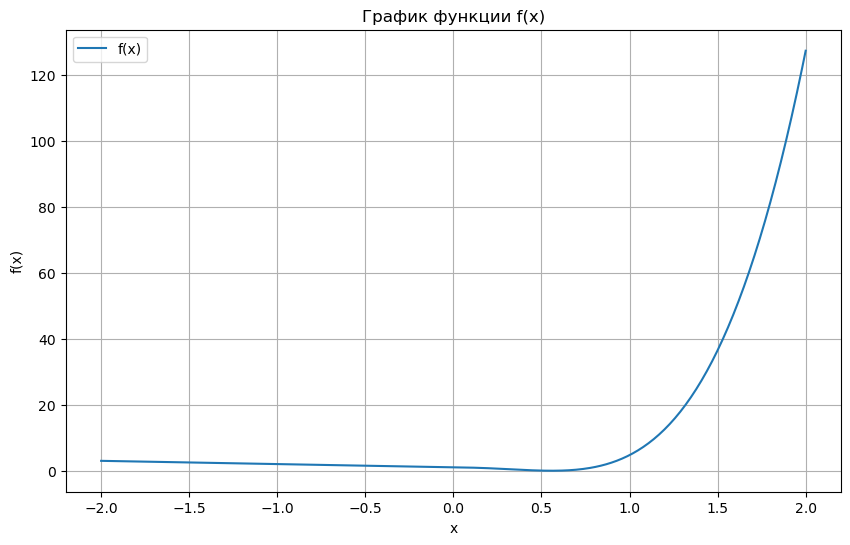

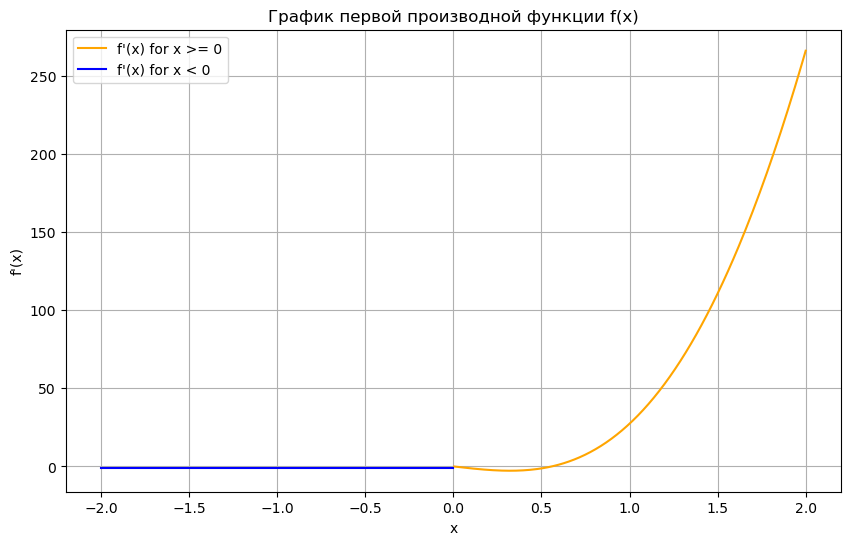

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt



class Function:
    """
    Класс Function для анализа и визуализации поведения заданной функции.
    Поддерживает вычисление производных и построение графика функции.
    """

    def __init__(self):
        """
        Инициализирует экземпляр класса Function.
        Создаёт символьную переменную и определяет две части функции:
        одна для положительных значений x и другая для отрицательных.
        """
        self.f_negative_derivative = None
        self.f_positive_derivative = None
        self.x = sp.symbols('x')
        self.f_positive = (sp.cos(self.x) - math.e * self.x ** 2) ** 2  # для x >= 0
        self.f_negative = 1 - self.x  # для x < 0

    @staticmethod
    def f(x):
        """
        Статический метод для вычисления значения функции f(x).
        :param x: Входное значение, для которого нужно вычислить f(x).
        :return: Возвращает значение функции f(x) в зависимости от знака x.
        """
        if x >= 0:
            return (math.cos(x) - math.e * x ** 2) ** 2
        else:
            return 1 - x

    def calculate_derivatives(self):
        """
        Вычисляет производные для обеих частей функции (положительной и отрицательной).
        :return: Кортеж с производными для положительной и отрицательной частей функции.
        """
        self.f_positive_derivative = sp.diff(self.f_positive, self.x)
        self.f_negative_derivative = sp.diff(self.f_negative, self.x)
        return self.f_positive_derivative, self.f_negative_derivative

    def plot_function(self, start=-2, end=2, num_points=400):
        """
        Строит график функции f(x) на заданном интервале.
        :param start: Начало интервала для построения графика.
        :param end: Конец интервала для построения графика.
        :param num_points: Количество точек для генерации на графике.
        """
        # Генерация точек x
        x_values = np.linspace(start, end, num_points)

        # Вычисление значений y
        y_values = np.vectorize(self.f)(x_values)

        # Построение графика
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, label='f(x)')
        plt.title('График функции f(x)')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()
        plt.show()

    def plot_derivative(self, start=-2, end=2, num_points=400):
        """
        Визуализирует первую производную функции f(x) на заданном интервале.
        :param start: Начало интервала для построения графика производной.
        :param end: Конец интервала для построения графика производной.
        :param num_points: Количество точек для генерации на графике.
        """
        # Убедимся, что производные вычислены
        if self.f_positive_derivative is None or self.f_negative_derivative is None:
            self.calculate_derivatives()

        # Генерация точек x и разделение на две части
        x_values = np.linspace(start, end, num_points)
        x_positive = x_values[x_values >= 0]
        x_negative = x_values[x_values < 0]

        # Вычисление значений производных
        f_prime_positive = np.vectorize(sp.lambdify(self.x, self.f_positive_derivative))(x_positive)
        f_prime_negative = np.vectorize(sp.lambdify(self.x, self.f_negative_derivative))(x_negative)

        # Построение графика
        plt.figure(figsize=(10, 6))
        plt.plot(x_positive, f_prime_positive, label="f'(x) for x >= 0", color='orange')
        plt.plot(x_negative, f_prime_negative, label="f'(x) for x < 0", color='blue')
        plt.title('График первой производной функции f(x)')
        plt.xlabel('x')
        plt.ylabel("f'(x)")
        plt.grid(True)
        plt.legend()
        plt.show()


# Создание экземпляра класса и тестирование функций
function = Function()
derivatives = function.calculate_derivatives()
print(derivatives)
function.plot_function()
function.plot_derivative()


In [10]:
class Config:
    """
    Класс конфигурации для хранения констант.

    Атрибуты:
    - SVEN_START_POINT: Начальная точка для метода Свена.
    - SVEN_STEP_SIZE: Шаг поиска для метода Свена.
    - INTERVAL: Интервал
    - FIBONACCI_ITERATIONS: Количество итераций для метода Фибоначчи.
    - PRECISION: Желаемая точность.
    """
    # Параметры для метода Свена
    SVEN_START_POINT = 0
    SVEN_STEP_SIZE = 1

    # Интервал, задаваемый пользователем
    INTERVAL = (-0.25, 0.75)

    # Параметры для метода Фибоначчи
    FIBONACCI_ITERATIONS = 10000
    PRECISION = 0.0001


In [21]:
import math
from functools import reduce


class SvenMethod:
    """
    Класс для реализации метода Свена.
    Используется для нахождения интервала неопределенности, в котором лежит минимум функции.
    """
    def __init__(self, func, start_point, step_size):
        """
        Инициализация класса.
        :param func: Функция, минимум которой необходимо найти.
        :param start_point: Начальная точка для поиска.
        :param step_size: Шаг поиска.
        """
        self.func = func
        self.start_point = start_point
        self.step_size = step_size

    def find_interval(self):
        """
        Находит интервал неопределенности для минимума функции.
        :return: Кортеж с границами интервала (min, max).
        """
        x0 = self.start_point   # x0 - начальная точка поиска
        delta = self.step_size  # delta - шаг поиска

        f0 = self.func(x0)      # Вычисление значения функции в начальной точке
        f1 = self.func(x0 + delta)  # Вычисление значения функции в точке x0 + delta

        # Если функция в точке x0 + delta больше, чем в x0, меняем направление поиска
        if f1 > f0:
            delta = -delta
            f1 = self.func(x0 + delta)  # Пересчитываем f1 для новой точки

        x1 = x0 + delta  # Новая точка поиска

        # Пока функция убывает, продолжаем двигаться в данном направлении
        while self.func(x1 + delta) < f1:
            delta *= 2                # Удваиваем шаг
            x0 = x1                   # Обновляем x0
            x1 = x0 + delta           # Вычисляем новую точку x1
            f1 = self.func(x1)        # Вычисляем значение функции в новой точке x1

        # Возвращаем интервал, где локализован минимум функции
        return min(x0, x1), max(x0, x1)


def fibonacci_number(n):
    """
    Вычисляет n-ое число Фибоначчи.
    :param n: Порядковый номер числа Фибоначчи.
    :return: n-ое число Фибоначчи.
    """
    # reduce функция:
    # reduce — это функция из модуля functools в Python. Она применяет указанную функцию к элементам последовательности (например, списка), "сворачивая" эту последовательность в одно значение. Функция reduce принимает три аргумента: функцию, последовательность и начальное значение аккумулятора.

    # Лямбда-функция:
    # lambda sequence, _: sequence + [sequence[-1] + sequence[-2]]. Это функция, которая принимает два аргумента: sequence и _. В контексте reduce, sequence — это текущее значение аккумулятора (начинается с начального значения), а _ — текущий элемент последовательности. Однако в данной лямбда-функции _ игнорируется (что обозначается символом _), так как нас интересует только аккумулятор sequence.

    # Тело лямбда-функции:
    # sequence + [sequence[-1] + sequence[-2]]. Здесь мы добавляем к текущему списку sequence новый элемент, который является суммой двух последних элементов этого списка. sequence[-1] обозначает последний элемент списка, а sequence[-2] — предпоследний.

    # Последовательность range(n - 1):
    # Это диапазон чисел от 0 до n - 1. Функция reduce будет применять лямбда-функцию к каждому элементу этого диапазона. Каждый вызов лямбда-функции расширяет список sequence, добавляя в него новое число Фибоначчи.

    #Начальное значение [0, 1]: Это начальное значение аккумулятора sequence для reduce. Оно представляет собой список с первыми двумя числами Фибоначчи.
    fibonacci_sequence = reduce(
        lambda sequence, _: sequence + [sequence[-1] + sequence[-2]],
        range(n - 1), [0, 1])
    return fibonacci_sequence[-1]


class FibonacciMethod:
    """
    Класс для поиска минимума функции с использованием метода Фибоначчи.
    """
    def __init__(self, func, interval, n):
        """
        Инициализация класса.
        :param func: Функция, минимум которой необходимо найти.
        :param interval: Интервал неопределенности.
        :param n: Количество итераций метода.
        """
        self.func = func
        self.a, self.b = interval
        self.n = n

    def find_minimum(self, precision):
        """
        Находит минимум функции на заданном интервале с использованием метода Фибоначчи.
        :param precision: Желаемая точность результата.
        :return: Точка минимума функции.
        """
        '''
        a, b = self.a, self.b
        k = 0
        while k < self.n and (b - a) > precision:
            x1 = a + (fibonacci_number(self.n - k - 2) / fibonacci_number(self.n - k)) * (b - a)
            x2 = a + (fibonacci_number(self.n - k - 1) / fibonacci_number(self.n - k)) * (b - a)

            if self.func(x1) < self.func(x2):
                b = x2
            else:
                a = x1

            k += 1

        return (a + b) / 2
        '''
        a, b = self.a, self.b
        k = 0
        while k < self.n:
            x1 = a + (fibonacci_number(self.n - k - 2) / fibonacci_number(self.n - k)) * (b - a)
            x2 = a + (fibonacci_number(self.n - k - 1) / fibonacci_number(self.n - k)) * (b - a)

            func_x1 = self.func(x1)
            func_x2 = self.func(x2)

            # Условие остановки: разница значений функции и интервалов меньше заданной точности
            if abs(func_x1 - func_x2) < precision and (b - a) < precision:
                break

            if func_x1 < func_x2:
                b = x2
            else:
                a = x1

            k += 1

        return (a + b) / 2



# Пример функции для минимизации
def f(x):
    """
    Пример функции для демонстрации работы методов.
    :param x: Независимая переменная.
    :return: Значение функции.
    """
    if x >= 0:
        return (math.cos(x) - math.e * x ** 2) ** 2
    else:
        return 1 - x



# Использование классов для поиска минимума
sven_method = SvenMethod(func=f, start_point=Config.SVEN_START_POINT, step_size=Config.SVEN_STEP_SIZE)
interval = sven_method.find_interval()

print(f'Интервал неопределенности: {interval},'
      f' вычисленный с помощью алгоритма Свена, при начальной точке: {Config.SVEN_START_POINT} и определенном шаге : {Config.SVEN_STEP_SIZE}')

fibonacci_method = FibonacciMethod(func=f, interval=interval, n=Config.FIBONACCI_ITERATIONS)
minimum = fibonacci_method.find_minimum(precision=Config.PRECISION)


print(f'Минимум функции: {minimum}')


Интервал неопределенности: (-1, 0), вычисленный с помощью алгоритма Свена, при начальной точке: 0 и определенном шаге : 1
Минимум функции: -3.3053480675947975e-05
